In [1]:
import numpy as np
import pandas as pd
import anndata
import h5py
import os
import scipy
import tqdm
import sys
from grelu.interpret.motifs import trim_pwm
from grelu.visualize import plot_attributions
from plotnine import *
sys.path.append('/code/decima/src/decima')

from interpret import read_meme_file
from visualize import plot_logo
%matplotlib inline

/usr/local/lib/python3.11/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Paths

In [2]:
save_dir="/gstore/data/resbioai/grelu/decima/20240823"
matrix_file = os.path.join(save_dir, "data.h5ad")

## Load data

In [3]:
ad = anndata.read_h5ad(matrix_file)
ad = ad[ad.obs.cell_type=='fibroblast']

In [9]:
motifs, names = read_meme_file('../H12CORE_meme_format.meme')

## Predict differential expression

In [10]:
ad.var['diff_true'] = ad[ad.obs.organ == 'heart'].X.mean(0) - ad[ad.obs.organ != 'heart'].X.mean(0)
ad.var['diff_pred'] =  ad[ad.obs.organ == 'heart'].layers['preds'].mean(0) - ad[ad.obs.organ != 'heart'].layers['preds'].mean(0)

/tmp/ipykernel_118792/632031917.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.


In [11]:
print(scipy.stats.pearsonr(ad.var.loc[ad.var.dataset=='test', 'diff_true'], ad.var.loc[ad.var.dataset=='test', 'diff_pred']))

PearsonRResult(statistic=0.530618035939461, pvalue=4.523144069619586e-132)


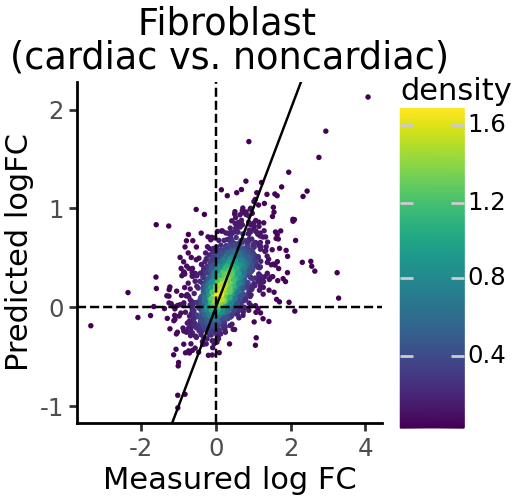

In [12]:
(
    ggplot(ad.var[ad.var.dataset=='test'], aes(x='diff_true', y='diff_pred')) 
    + geom_pointdensity(size=.1) + theme_classic() + theme(figure_size=(2.6, 2.5))
    + xlab('Measured log FC') + ylab('Predicted logFC')
    + ggtitle('           Fibroblast\n(cardiac vs. noncardiac)')
    + geom_abline(slope=1, intercept=0)
    + geom_vline(xintercept = 0, linetype='--')
    + geom_hline(yintercept = 0, linetype='--')
)

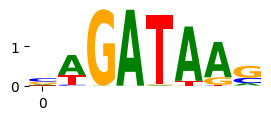

In [49]:
plot_logo(motifs[np.where(np.array(names)=='GATA4')[0][0]], figsize=(3, 1))